In [87]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [88]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

Чтение оригинальной картинки

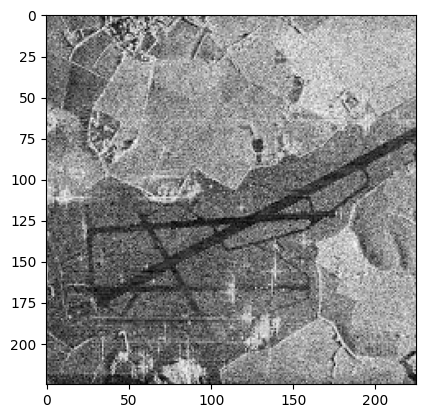

In [89]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")


Избавление от шумов

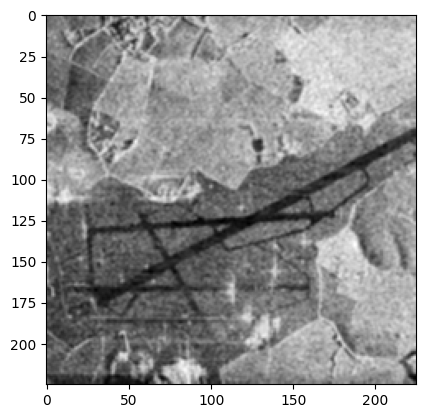

In [90]:
blurred_img = cv2.GaussianBlur(image_gray, (3, 3), 0)
plt.imshow(blurred_img, cmap="gray")

1. Для изображения sar_3.jpg найти наиболее протяженный участок
(выделить линии при помощи преобразования Хафа)

Детектор краёв Canny

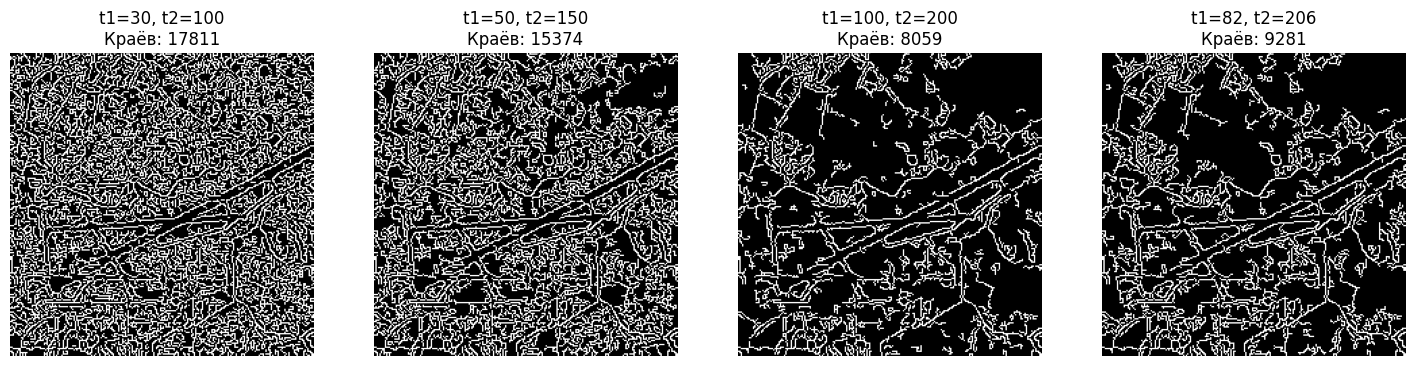

In [91]:
import matplotlib.pyplot as plt

# Тест разных наборов
params = [(30, 100), (50, 150), (100, 200), (82, 206)]  # Включая рекомендуемые
fig, axs = plt.subplots(1, len(params), figsize=(18, 5))
for i, (t1, t2) in enumerate(params):
    edges = cv2.Canny(blurred_img, t1, t2, apertureSize=3)
    num_edges = np.sum(edges > 0)
    axs[i].imshow(edges, cmap='gray')
    axs[i].set_title(f't1={t1}, t2={t2}\nКраёв: {num_edges}')
    axs[i].axis('off')
plt.show()

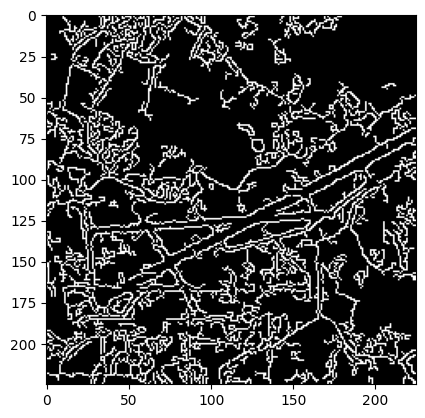

In [92]:
plt.imshow(edges, cmap="gray")

2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

1. Точечная бинаризация

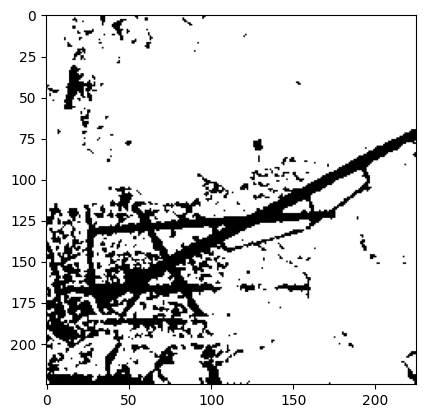

In [93]:
bin_img = copy.deepcopy(blurred_img)
T  = 90
bin_img[blurred_img < T] = 0
bin_img[blurred_img >= T] = 255
plt.imshow(bin_img, cmap="gray")

2. Бинаризация Отсу

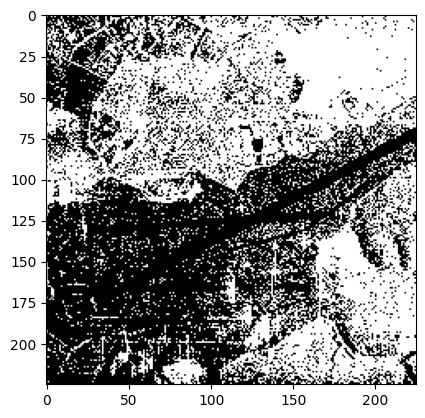

In [98]:
_,th2 = cv2.threshold(image_gray,0,90,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")

3. Адаптивная бинаризация

1-ый способ: адаптивная бинаризация

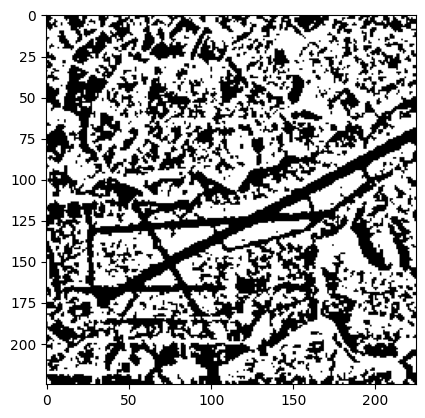

In [95]:
th3 = cv2.adaptiveThreshold(blurred_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,41,3)
plt.imshow(th3, cmap="gray")